<a href="https://colab.research.google.com/github/Mohamedragih1/Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

**Data Preparation**

In [ ]:
# Download MNIST dataset from torchvision
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
combined_data = torch.utils.data.ConcatDataset([train_data, test_data])

# Split Dataset
train_set, val_set = train_test_split(combined_data, test_size=0.2, random_state=42)

# Use Torch DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)

**Neural Network Implementation**

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, dropout_prob=0.2):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.norm2 = nn.LayerNorm(64)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(64, 32)
        self.norm3 = nn.LayerNorm(32)
        self.dropout3 = nn.Dropout(p=dropout_prob)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.norm2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.norm3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return F.softmax(x, dim = 1)

# Initialize model and optimizer as required
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

**Training and Validation**

In [ ]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
    return running_loss / len(train_loader), correct / total

def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            val_loss += criterion(output, target).item()
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return val_loss / len(val_loader), correct / total



In [ ]:
# Training Loop
epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc = validate(model, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    print(f"Epoch [{epoch+1}/{epochs}] => Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")

Epoch [1/10] => Train Loss: 2.1440, Val Loss: 1.9159, train Accuracy: 0.5008, Val Accuracy: 0.7262
Epoch [2/10] => Train Loss: 1.8386, Val Loss: 1.6758, train Accuracy: 0.7635, Val Accuracy: 0.8366
Epoch [3/10] => Train Loss: 1.7036, Val Loss: 1.6232, train Accuracy: 0.8239, Val Accuracy: 0.8534
Epoch [4/10] => Train Loss: 1.6575, Val Loss: 1.5945, train Accuracy: 0.8467, Val Accuracy: 0.8881
Epoch [5/10] => Train Loss: 1.6034, Val Loss: 1.5340, train Accuracy: 0.9068, Val Accuracy: 0.9411
Epoch [6/10] => Train Loss: 1.5658, Val Loss: 1.5238, train Accuracy: 0.9325, Val Accuracy: 0.9442
Epoch [7/10] => Train Loss: 1.5491, Val Loss: 1.5158, train Accuracy: 0.9412, Val Accuracy: 0.9509
Epoch [8/10] => Train Loss: 1.5369, Val Loss: 1.5113, train Accuracy: 0.9483, Val Accuracy: 0.9540
Epoch [9/10] => Train Loss: 1.5285, Val Loss: 1.5093, train Accuracy: 0.9536, Val Accuracy: 0.9548
Epoch [10/10] => Train Loss: 1.5223, Val Loss: 1.5042, train Accuracy: 0.9564, Val Accuracy: 0.9601


**Plotting**

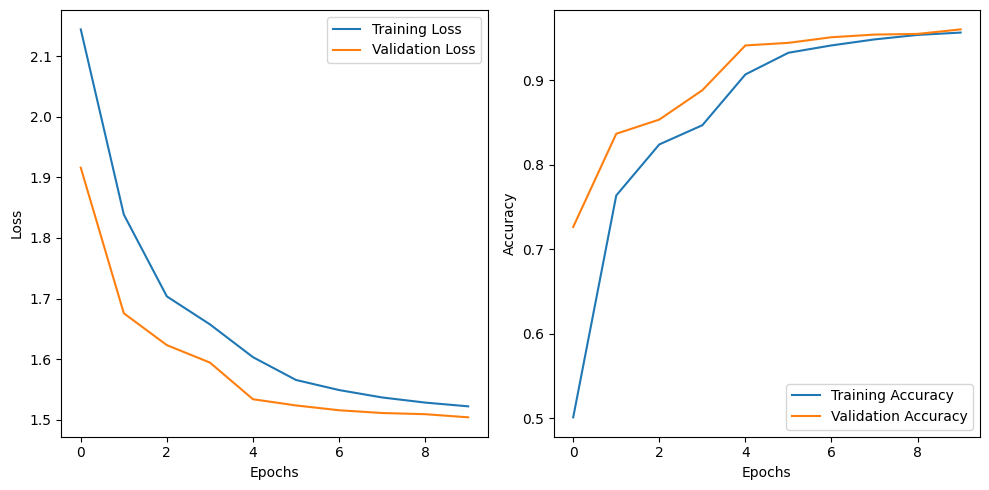

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

 the loss decreases initially with different numbers of epochs and then the decrease becomes less noticeable or slows down,

**Evaluating different learning rates**

In [ ]:
#define different learning rate values
learning_rates = [0.001,0.004,0.007, 0.01,0.04,0.07, 0.1, 0.4,0.7, 1.0]
batch_sizes = [16,32,64,128,256,512]
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
epochs = 10
for index,lr in enumerate(learning_rates):
    model = SimpleNN()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    print(f"learning rate={learning_rates[index]}")
    for epoch in range(epochs):
      train_loss, train_acc = train(model, train_loader, optimizer, criterion)
      val_loss, val_acc = validate(model, val_loader, criterion)
      print(f"Epoch [{epoch+1}/{epochs}] => Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)


learning rate=0.001
Epoch [1/10] => Train Loss: 2.2935, Val Loss: 2.2795, train Accuracy: 0.1583, Val Accuracy: 0.2434
Epoch [2/10] => Train Loss: 2.2705, Val Loss: 2.2470, train Accuracy: 0.2581, Val Accuracy: 0.3516
Epoch [3/10] => Train Loss: 2.2435, Val Loss: 2.2140, train Accuracy: 0.3494, Val Accuracy: 0.4839
Epoch [4/10] => Train Loss: 2.2149, Val Loss: 2.1801, train Accuracy: 0.4212, Val Accuracy: 0.5364
Epoch [5/10] => Train Loss: 2.1848, Val Loss: 2.1452, train Accuracy: 0.4708, Val Accuracy: 0.5667
Epoch [6/10] => Train Loss: 2.1541, Val Loss: 2.1100, train Accuracy: 0.4994, Val Accuracy: 0.5849
Epoch [7/10] => Train Loss: 2.1239, Val Loss: 2.0754, train Accuracy: 0.5215, Val Accuracy: 0.6001
Epoch [8/10] => Train Loss: 2.0944, Val Loss: 2.0426, train Accuracy: 0.5427, Val Accuracy: 0.6127
Epoch [9/10] => Train Loss: 2.0658, Val Loss: 2.0123, train Accuracy: 0.5596, Val Accuracy: 0.6269
Epoch [10/10] => Train Loss: 2.0406, Val Loss: 1.9842, train Accuracy: 0.5774, Val Accura

 optimal learning rate (0.07) that was identified through training expermentation

**Analyzing Learning Rate Impact on Model Performance**

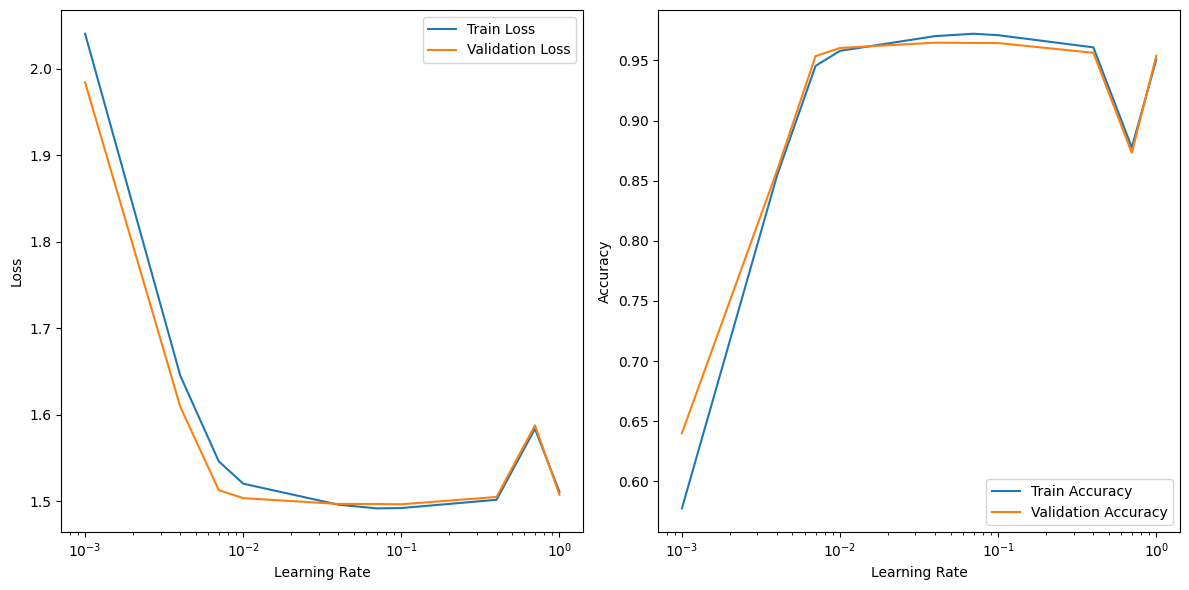

In [ ]:
import matplotlib.pyplot as plt

# Plotting learning rate with loss
plt.figure(figsize=(12, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(learning_rates, train_losses, label='Train Loss')
plt.plot(learning_rates, val_losses, label='Validation Loss')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(learning_rates, train_accuracies, label='Train Accuracy')
plt.plot(learning_rates, val_accuracies, label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Changing Batch Sizes**

In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Iterating through batch sizes and training the model
for index,bs in enumerate(batch_sizes):
  model = SimpleNN()
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  train_loader = torch.utils.data.DataLoader(train_set, batch_size=bs, shuffle=True)
  val_loader = torch.utils.data.DataLoader(val_set, batch_size=bs, shuffle=False)
  print(f"batch size={bs}")

  # Training Loop
  epochs = 10
  for epoch in range(epochs):
      train_loss, train_acc = train(model, train_loader, optimizer, criterion)
      val_loss, val_acc = validate(model, val_loader, criterion)
      print(f"Epoch [{epoch+1}/{epochs}] => Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, train Accuracy: {train_acc:.4f}, Val Accuracy: {val_acc:.4f}")
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accuracies.append(train_acc)
  val_accuracies.append(val_acc)

batch size=16
Epoch [1/10] => Train Loss: 1.8595, Val Loss: 1.5636, train Accuracy: 0.7167, Val Accuracy: 0.9216
Epoch [2/10] => Train Loss: 1.5710, Val Loss: 1.5185, train Accuracy: 0.9238, Val Accuracy: 0.9471
Epoch [3/10] => Train Loss: 1.5336, Val Loss: 1.5094, train Accuracy: 0.9439, Val Accuracy: 0.9533
Epoch [4/10] => Train Loss: 1.5207, Val Loss: 1.5065, train Accuracy: 0.9518, Val Accuracy: 0.9555
Epoch [5/10] => Train Loss: 1.5118, Val Loss: 1.5042, train Accuracy: 0.9583, Val Accuracy: 0.9578
Epoch [6/10] => Train Loss: 1.5062, Val Loss: 1.4995, train Accuracy: 0.9623, Val Accuracy: 0.9625
Epoch [7/10] => Train Loss: 1.5015, Val Loss: 1.4974, train Accuracy: 0.9655, Val Accuracy: 0.9637
Epoch [8/10] => Train Loss: 1.4978, Val Loss: 1.5023, train Accuracy: 0.9691, Val Accuracy: 0.9591
Epoch [9/10] => Train Loss: 1.4949, Val Loss: 1.4946, train Accuracy: 0.9708, Val Accuracy: 0.9668
Epoch [10/10] => Train Loss: 1.4929, Val Loss: 1.4925, train Accuracy: 0.9725, Val Accuracy: 0.

 smaller batch size resulted in better accuracy,as smaller batch sizes prevent overfitting and less likely to be affected by outliers

**Exploring Batch Size Impact on Model Performance**

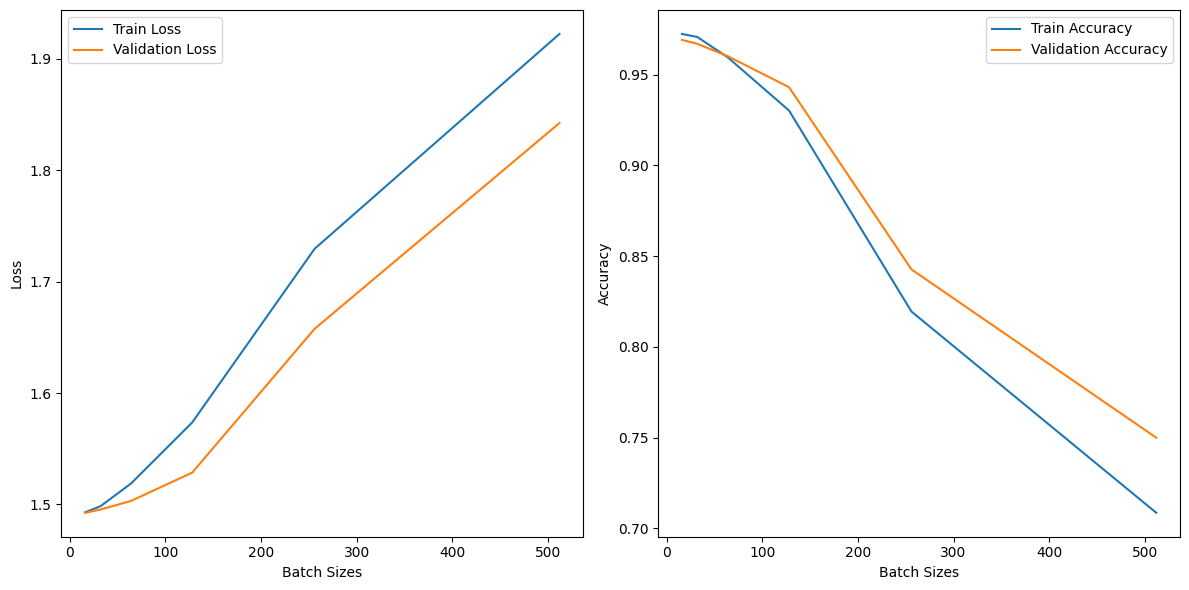

In [ ]:
# Plotting Batch size with loss
plt.figure(figsize=(12, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, train_losses, label='Train Loss')
plt.plot(batch_sizes, val_losses, label='Validation Loss')
plt.xlabel('Batch Sizes')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, train_accuracies, label='Train Accuracy')
plt.plot(batch_sizes, val_accuracies, label='Validation Accuracy')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
